In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('BA_reviews.csv')

In [3]:

df

Unnamed: 0                                            reviews
0             0  ✅ Trip Verified |  Worst experience of my life...
1             1  ✅ Trip Verified |  Due to code sharing with Ca...
2             2  ✅ Trip Verified |  LHR check in was quick at t...
3             3  ✅ Trip Verified |  I wouldn't recommend Britis...
4             4  ✅ Trip Verified |  Absolutely horrible experie...
..          ...                                                ...
995         995  ✅ Trip Verified | I have flown British Airways...
996         996  ✅ Trip Verified | We can not fault the new 'Cl...
997         997  ✅ Trip Verified |  Very disappointing experien...
998         998  ✅ Trip Verified |  Calgary to London. Cabin fu...
999         999  ✅ Trip Verified |  London to Zurich. The airli...

[1000 rows x 2 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   reviews     1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [5]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [6]:
df

reviews
0    ✅ Trip Verified |  Worst experience of my life...
1    ✅ Trip Verified |  Due to code sharing with Ca...
2    ✅ Trip Verified |  LHR check in was quick at t...
3    ✅ Trip Verified |  I wouldn't recommend Britis...
4    ✅ Trip Verified |  Absolutely horrible experie...
..                                                 ...
995  ✅ Trip Verified | I have flown British Airways...
996  ✅ Trip Verified | We can not fault the new 'Cl...
997  ✅ Trip Verified |  Very disappointing experien...
998  ✅ Trip Verified |  Calgary to London. Cabin fu...
999  ✅ Trip Verified |  London to Zurich. The airli...

[1000 rows x 1 columns]

In [7]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [8]:
df

reviews
0      Worst experience of my life trying to deal w...
1      Due to code sharing with Cathay Pacific I wa...
2      LHR check in was quick at the First Wing and...
3      I wouldn't recommend British Airways at all....
4      Absolutely horrible experience. I booked a t...
..                                                 ...
995   I have flown British Airways numerous times o...
996   We can not fault the new 'Club World' food an...
997    Very disappointing experience - flew out on ...
998    Calgary to London. Cabin full. Overhead lock...
999    London to Zurich. The airline isn’t bad. The...

[1000 rows x 1 columns]

In [9]:
import re
def clean(text):
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

In [12]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [10]:
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

reviews  \
0    Worst experience of my life trying to deal w...   
1    Due to code sharing with Cathay Pacific I wa...   
2    LHR check in was quick at the First Wing and...   
3    I wouldn't recommend British Airways at all....   
4    Absolutely horrible experience. I booked a t...   

                                     Cleaned Reviews  
0   Worst experience of my life trying to deal wi...  
1   Due to code sharing with Cathay Pacific I was...  
2   LHR check in was quick at the First Wing and ...  
3   I wouldn t recommend British Airways at all I...  
4   Absolutely horrible experience I booked a tic...

In [17]:

pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          print(tag[0])
          print(pos_dict.get(tag[0]))
    return newlist 

In [19]:
df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)


[('Worst', 'NNP'), ('experience', 'NN'), ('of', 'IN'), ('my', 'PRP$'), ('life', 'NN'), ('trying', 'VBG'), ('to', 'TO'), ('deal', 'VB'), ('with', 'IN'), ('the', 'DT'), ('customer', 'NN'), ('service', 'NN'), ('for', 'IN'), ('British', 'JJ'), ('Airways', 'NNP'), ('So', 'NNP'), ('many', 'JJ'), ('issues', 'NNS'), ('with', 'IN'), ('getting', 'VBG'), ('from', 'IN'), ('one', 'CD'), ('destination', 'NN'), ('to', 'TO'), ('the', 'DT'), ('other', 'JJ'), ('Had', 'NNP'), ('an', 'DT'), ('absolutely', 'RB'), ('horrible', 'JJ'), ('time', 'NN'), ('trying', 'VBG'), ('to', 'TO'), ('get', 'VB'), ('answers', 'NNS'), ('or', 'CC'), ('reach', 'VBP'), ('anyone', 'NN'), ('who', 'WP'), ('was', 'VBD'), ('capable', 'JJ'), ('of', 'IN'), ('helping', 'VBG'), ('navigate', 'JJ'), ('uncertainties', 'NNS'), ('I', 'PRP'), ('wrote', 'VBD'), ('them', 'PRP'), ('a', 'DT'), ('formal', 'JJ'), ('complaint', 'NN'), ('requesting', 'VBG'), ('some', 'DT'), ('type', 'NN'), ('of', 'IN'), ('refund', 'NN'), ('and', 'CC'), ('received', 'V

In [20]:
df.head()

reviews  \
0    Worst experience of my life trying to deal w...   
1    Due to code sharing with Cathay Pacific I wa...   
2    LHR check in was quick at the First Wing and...   
3    I wouldn't recommend British Airways at all....   
4    Absolutely horrible experience. I booked a t...   

                                     Cleaned Reviews  \
0   Worst experience of my life trying to deal wi...   
1   Due to code sharing with Cathay Pacific I was...   
2   LHR check in was quick at the First Wing and ...   
3   I wouldn t recommend British Airways at all I...   
4   Absolutely horrible experience I booked a tic...   

                                          POS tagged  
0  [(Worst, n), (experience, n), (life, n), (tryi...  
1  [(Due, a), (code, v), (sharing, v), (Cathay, n...  
2  [(LHR, n), (check, n), (quick, a), (First, n),...  
3  [(recommend, v), (British, a), (Airways, n), (...  
4  [(Absolutely, r), (horrible, a), (experience, ...

In [21]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

In [22]:
df['Lemma'] = df['POS tagged'].apply(lemmatize)


In [23]:
df.head()

reviews  \
0    Worst experience of my life trying to deal w...   
1    Due to code sharing with Cathay Pacific I wa...   
2    LHR check in was quick at the First Wing and...   
3    I wouldn't recommend British Airways at all....   
4    Absolutely horrible experience. I booked a t...   

                                     Cleaned Reviews  \
0   Worst experience of my life trying to deal wi...   
1   Due to code sharing with Cathay Pacific I was...   
2   LHR check in was quick at the First Wing and ...   
3   I wouldn t recommend British Airways at all I...   
4   Absolutely horrible experience I booked a tic...   

                                          POS tagged  \
0  [(Worst, n), (experience, n), (life, n), (tryi...   
1  [(Due, a), (code, v), (sharing, v), (Cathay, n...   
2  [(LHR, n), (check, n), (quick, a), (First, n),...   
3  [(recommend, v), (British, a), (Airways, n), (...   
4  [(Absolutely, r), (horrible, a), (experience, ...   

                                               Lemma  
0    Worst experience life try deal customer serv...  
1    Due code share Cathay Pacific downgrade BA r...  
2    LHR check quick First Wing quickly security ...  
3    recommend British Airways try call customer ...  
4    Absolutely horrible experience book ticket E...

In [24]:
df[['reviews','Lemma']]

reviews  \
0      Worst experience of my life trying to deal w...   
1      Due to code sharing with Cathay Pacific I wa...   
2      LHR check in was quick at the First Wing and...   
3      I wouldn't recommend British Airways at all....   
4      Absolutely horrible experience. I booked a t...   
..                                                 ...   
995   I have flown British Airways numerous times o...   
996   We can not fault the new 'Club World' food an...   
997    Very disappointing experience - flew out on ...   
998    Calgary to London. Cabin full. Overhead lock...   
999    London to Zurich. The airline isn’t bad. The...   

                                                 Lemma  
0      Worst experience life try deal customer serv...  
1      Due code share Cathay Pacific downgrade BA r...  
2      LHR check quick First Wing quickly security ...  
3      recommend British Airways try call customer ...  
4      Absolutely horrible experience book ticket E...  
..                                                 ...  
995    fly British Airways numerous time many year ...  
996    fault new Club World food service outbound i...  
997    disappointing experience fly series scrap De...  
998    Calgary London Cabin full Overhead locker fu...  
999    London Zurich airline bad boarding procedure...  

[1000 rows x 2 columns]

# using VADER

In [25]:
!pip install vaderSentiment

     -------------------------------------- 126.0/126.0 kB 1.5 MB/s eta 0:00:00


In [26]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()



def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)


def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

reviews  \
0    Worst experience of my life trying to deal w...   
1    Due to code sharing with Cathay Pacific I wa...   
2    LHR check in was quick at the First Wing and...   
3    I wouldn't recommend British Airways at all....   
4    Absolutely horrible experience. I booked a t...   

                                     Cleaned Reviews  \
0   Worst experience of my life trying to deal wi...   
1   Due to code sharing with Cathay Pacific I was...   
2   LHR check in was quick at the First Wing and ...   
3   I wouldn t recommend British Airways at all I...   
4   Absolutely horrible experience I booked a tic...   

                                          POS tagged  \
0  [(Worst, n), (experience, n), (life, n), (tryi...   
1  [(Due, a), (code, v), (sharing, v), (Cathay, n...   
2  [(LHR, n), (check, n), (quick, a), (First, n),...   
3  [(recommend, v), (British, a), (Airways, n), (...   
4  [(Absolutely, r), (horrible, a), (experience, ...   

                                               Lemma  Sentiment  Analysis  
0    Worst experience life try deal customer serv...    -0.9324  Negative  
1    Due code share Cathay Pacific downgrade BA r...    -0.5369  Negative  
2    LHR check quick First Wing quickly security ...     0.9454  Positive  
3    recommend British Airways try call customer ...     0.2023   Neutral  
4    Absolutely horrible experience book ticket E...    -0.9500  Negative

In [27]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    524
Negative    371
Neutral     105
Name: Analysis, dtype: int64

In [28]:
#word cloud

In [30]:
! pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 1.5 MB/s eta 0:00:00


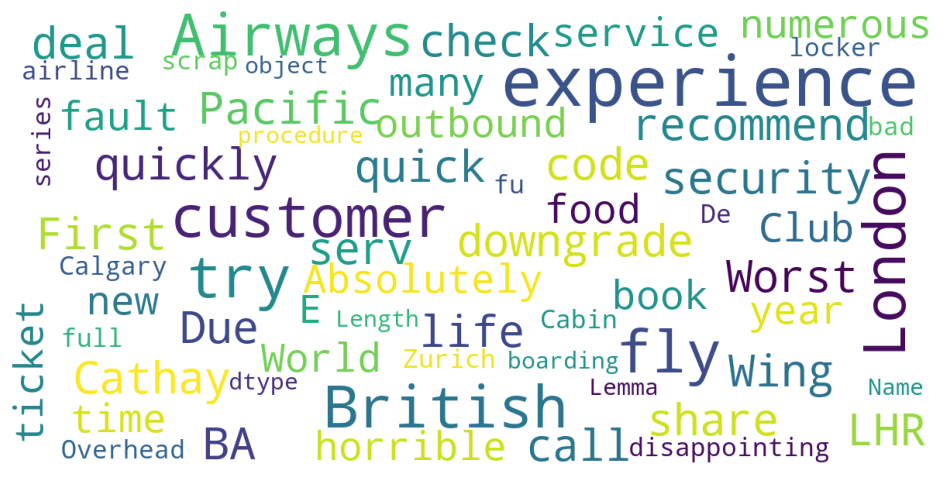

In [32]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)